In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
df = pd.read_csv("Data/Airline Dataset Updated - v2.csv")


### 1. Exploratory Data Analysis

In [3]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [4]:
df.head(6)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time


In [5]:
def date_parser(date_str): 
    try:
        return pd.to_datetime (date_str, format = '%m/%d/%Y')
    except ValueError:
        return pd.to_datetime (date_str, format = '%m-%d-%Y', errors = 'coerce')

In [6]:
df['Departure Date'] = df['Departure Date'].apply(date_parser)

In [7]:
cond_1 = df['Age'] > 60 

In [8]:
cond_2 = (df['Flight Status'] == 'On Time')

In [9]:
cond_3 = (df['Flight Status'] == 'Delayed')

In [10]:
cond_4 = (df['Flight Status'] == 'Cancelled')

In [11]:
cond_month = (df['Departure Date'].dt.month )

In [12]:
cond_6 = (df['Age'] <25 )

In [13]:
cond_7 = (25 <= df['Age']) & (df['Age'] <= 60 )

In [14]:
cond_8 = (df['Age'] > 60 )

In [15]:
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Judon Chasle,Cancelled


### Number of passengers who's flights are either on time, delayed or cancelled.

In [16]:
var_1 = df['Passenger ID'].loc[cond_2].count()
print("Number of flights on time -" , var_1)

var_2 = df['Passenger ID'].loc[cond_3].count()
print("Number of flights delayed -" , var_2)

var_3 = df['Passenger ID'].loc[cond_4].count()
print("Number of flights cancelled -" , var_3)


Number of flights on time - 32846
Number of flights delayed - 32831
Number of flights cancelled - 32942


### Age wise distribution of on time flights

In [17]:
var_4 = df['Passenger ID'].loc[cond_2 & cond_6 ].count()
print("Number of on time flights with passengers of age less than 25 ->" , var_4)

var_5 = df['Passenger ID'].loc[cond_2 & cond_7 ].count()
print("Number of on time flights with passengers of age between 25 to 60 ->" , var_5)

var_6 = df['Passenger ID'].loc[cond_2 & cond_8 ].count()
print("Number of on time flights with passengers of age more than 60 ->" , var_6)

Number of on time flights with passengers of age less than 25 -> 8772
Number of on time flights with passengers of age between 25 to 60 -> 13194
Number of on time flights with passengers of age more than 60 -> 10880


In [18]:
var_7 = df['Passenger ID'].loc[cond_3 & cond_6 ].count()
print("Number of delayed flights with passengers of age less than 25 ->" , var_7)

var_8 = df['Passenger ID'].loc[cond_3 & cond_7 ].count()
print("Number of delayed flights with passengers of age between 25 to 60 ->" , var_8)

var_9 = df['Passenger ID'].loc[cond_3 & cond_8 ].count()
print("Number of delayed flights with passengers of age more than 60 ->" , var_9)

Number of delayed flights with passengers of age less than 25 -> 8666
Number of delayed flights with passengers of age between 25 to 60 -> 13218
Number of delayed flights with passengers of age more than 60 -> 10947


In [19]:
df["Month"] = df['Departure Date'].dt.month

In [20]:
df.head(50)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Month
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,6
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,12
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,1
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,9
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,2
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,2022-06-10,LEC,Inglis Dolley,On Time,6
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,2022-10-30,QFO,Stanislas Tiffin,Cancelled,10
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,2022-04-07,STM,Sharyl Eastmead,Cancelled,4
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,2022-08-20,VCE,Daryn Bardsley,On Time,8
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,2022-04-06,YVG,Alameda Carlyle,On Time,4


### 2. Month wise distribution     

#### 2.1  Total number of passengers month wise- 

In [21]:
counter_1 = df['Month'].value_counts()
counter_1

Month
8     8544
5     8496
7     8451
3     8431
1     8416
10    8415
9     8149
6     8128
11    8053
4     7959
12    7924
2     7653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

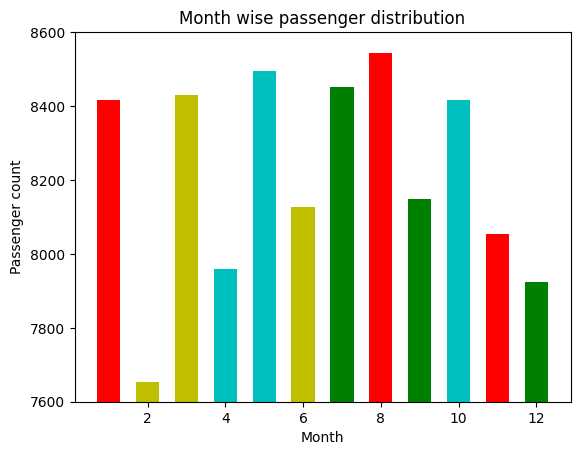

In [22]:
plt.bar(counter_1.index, counter_1.values, color = ["r", "c", "g", "y"], width= 0.6)
plt.ylim(7600, 8600)
plt.ylabel("Passenger count")
plt.xlabel("Month")
plt.title("Month wise passenger distribution")
plt.show

#### 2.2 Max flight delays happen in which month?

In [23]:
counter_2 = df["Month"].loc[cond_3].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

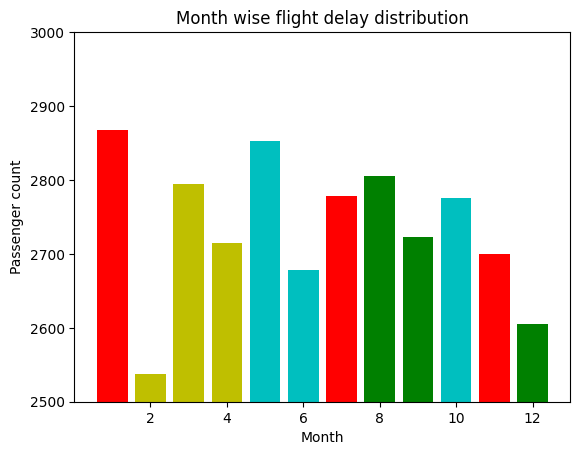

In [24]:
plt.bar(counter_2.index, counter_2.values, color = ["r", "c", "g", "y"])
plt.ylim(2500, 3000)
plt.ylabel("Passenger count")
plt.xlabel("Month")
plt.title("Month wise flight delay distribution")
plt.show

In [25]:
counter_2.idxmax() # Month with most on-time departures.

1

#### 2.3 Month with most on-time and cancelled departures?

In [26]:
max(df['Month'].loc[cond_2].value_counts())

2875

In [27]:
counter_3 = df['Month'].loc[cond_2].value_counts() ## Max ontime departure month.
counter_3.idxmax()

8

Text(0.5, 1.0, 'Month wise On-time departures')

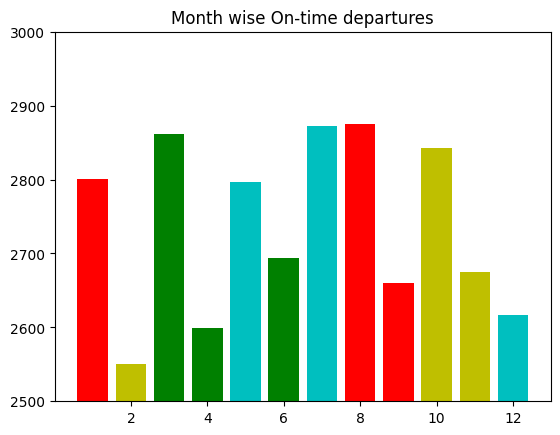

In [28]:
plt.bar(counter_3.index,counter_3.values,color = ["r", "c", "g", "y"])
plt.ylim(2500,3000)
plt.title("Month wise On-time departures")

In [29]:
counter_4 = df['Month'].loc[cond_4].value_counts()
counter_4

Month
8     2864
5     2846
7     2800
10    2797
3     2776
9     2766
6     2756
1     2747
12    2702
11    2678
4     2645
2     2565
Name: count, dtype: int64

In [30]:
counter_4.idxmax()

8

Text(0.5, 1.0, 'Month wise cancelled departures')

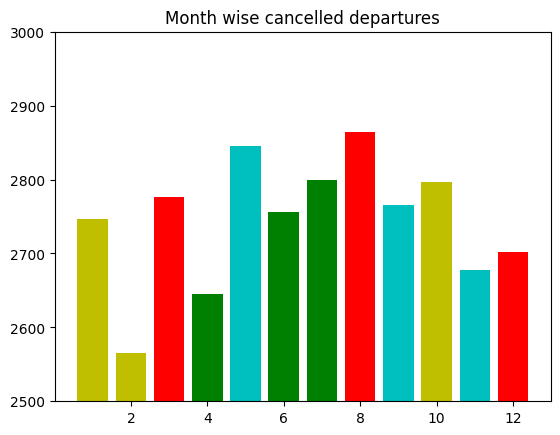

In [31]:
plt.bar(counter_4.index,counter_4.values,color = ["r", "c", "g", "y"])
plt.ylim(2500,3000)
plt.title("Month wise cancelled departures")

#### 2.4 Percentage wise most on time departures month wise

In [32]:
flt_ot = 100*(counter_3/counter_1)

In [33]:
flt_ot

Month
1     33.281844
2     33.333333
3     33.934290
4     32.654856
5     32.921375
6     33.144685
7     33.995977
8     33.649345
9     32.642042
10    33.784908
11    33.217434
12    33.026249
Name: count, dtype: float64

In [34]:
flt_dly = 100*(counter_2/counter_1)

In [35]:
flt_dly

Month
1     34.077947
2     33.150399
3     33.139604
4     34.112326
5     33.580508
6     32.947835
7     32.871849
8     32.830056
9     33.415143
10    32.976827
11    33.527878
12    32.874811
Name: count, dtype: float64

In [36]:
flt_dpt = counter_1 - counter_4

In [37]:
flt_dpt_dly = 100*(counter_3/flt_dpt)
flt_dpt_dly

Month
1     49.409067
2     50.137579
3     50.592396
4     48.908543
5     49.504425
6     50.148920
7     50.840559
8     50.616197
9     49.414824
10    50.605198
11    49.767442
12    50.114899
Name: count, dtype: float64

In [38]:
flt_can = 100*(counter_4/counter_1)
flt_can

Month
1     32.640209
2     33.516268
3     32.926106
4     33.232818
5     33.498117
6     33.907480
7     33.132174
8     33.520599
9     33.942815
10    33.238265
11    33.254688
12    34.098940
Name: count, dtype: float64

### 3. Country/Airport wise distribution. 

#### 3.1 Number of delays according to country

In [39]:
total_count = df["Country Name"].value_counts()

In [40]:
top_5 = total_count.nlargest(5)
top_5

Country Name
United States       22104
Australia            6370
Canada               5424
Brazil               4504
Papua New Guinea     4081
Name: count, dtype: int64

Text(0, 0.5, 'Passenger traffic')

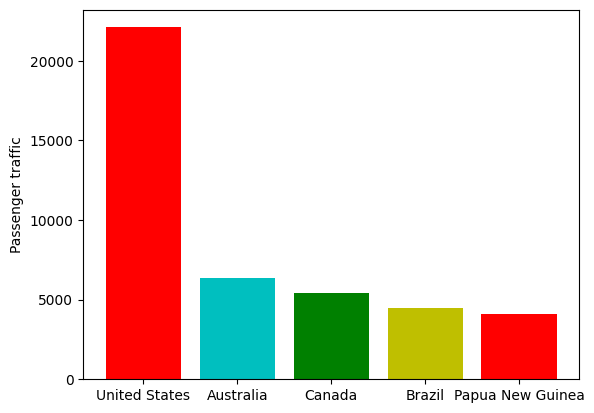

In [41]:
plt.bar(top_5.index, top_5.values, color = ["r", "c", "g", "y"])
plt.ylabel("Passenger traffic")

#### 3.1.1 Country with most delays. 

In [42]:
counter_5 = df["Country Name"].loc[cond_3].value_counts()

In [43]:
counter_5

Country Name
United States              7375
Australia                  2142
Canada                     1807
Brazil                     1472
Papua New Guinea           1372
                           ... 
Guinea-Bissau                 1
Andorra                       1
Cocos (Keeling) Islands       1
Jersey                        1
Brunei Darussalam             1
Name: count, Length: 235, dtype: int64

### Note :- Clearly America is the nation with most flight delays by number.

In [44]:
test_1 = 100* (counter_5/total_count)
test_1.sort_values(ascending = False) # Max percent of delayed departure 

Country Name
Palau                        60.000000
Guernsey                     56.250000
Sint Maarten (Dutch part)    55.555556
Saint Lucia                  55.555556
Mayotte                      53.846154
                               ...    
Togo                         17.391304
Andorra                      14.285714
Cocos (Keeling) Islands      12.500000
Brunei Darussalam            12.500000
Guinea-Bissau                10.000000
Name: count, Length: 235, dtype: float64

### Note- Palau is the country with highest percentage of delays where 60% of flights being delayed anually. But yearly the number of flights is only 5 so this is not a significant result. 

In [45]:
test_2 = test_1.rank().sort_values()
test_2["United States"]

128.0

In [68]:
test_1["United States"]

33.365001809627216

#### 3.1.2 Number of flights delayed in the US monthly.

In [47]:
us_delay = df['Month'].loc[(cond_3) & (df["Country Name"] == "United States") ].value_counts()


Text(0.5, 1.0, 'Monthly flights delay-USA')

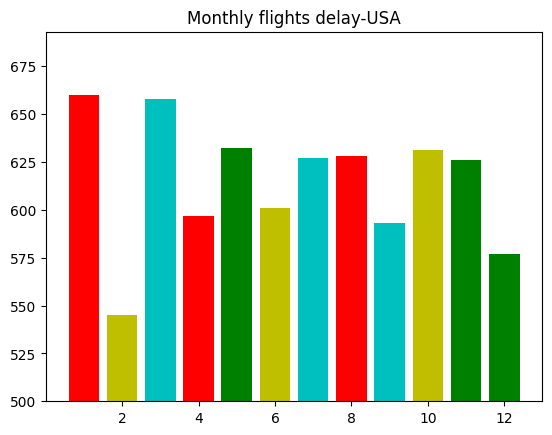

In [78]:
plt.bar(us_delay.index,us_delay.values,color = ["r", "c", "g", "y"] )
plt.ylim(500)
plt.title("Monthly flights delay-USA")

#### 3.1.2 Percentage of flight delay in the USA

In [49]:
total_count_us = df['Month'].loc[(df["Country Name"] == "United States") ].value_counts()
100* (us_delay/total_count_us)

Month
1     34.143818
2     32.634731
3     33.952528
4     34.114286
5     33.869239
6     33.259546
7     32.844421
8     33.564939
9     32.926152
10    33.245522
11    33.674018
12    32.019978
Name: count, dtype: float64

#### More than 34% delay in the month of January.

Text(0.5, 1.0, 'Montly flight delay percentage-USA')

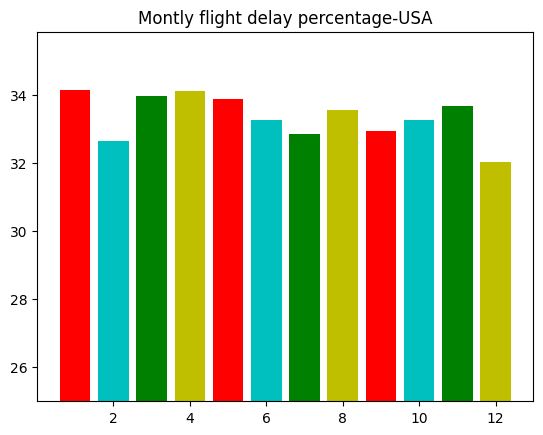

In [88]:
test_5 = 100*(us_delay/total_count_us)
plt.bar(test_5.index,test_5.values,color = ["r", "c", "g", "y"] )
plt.ylim(25)
plt.title("Montly flight delay percentage-USA")

In [67]:
total_count_us

Month
3     1938
1     1933
7     1909
10    1898
8     1871
5     1866
11    1859
6     1807
12    1802
9     1801
4     1750
2     1670
Name: count, dtype: int64

(1400.0, 2034.9)

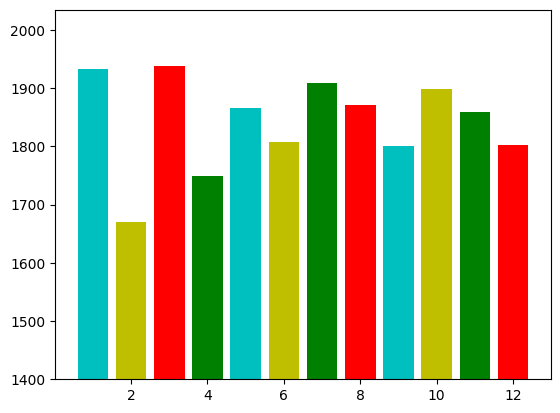

In [66]:
plt.bar(total_count_us.index,total_count_us.values,color = ["r", "c", "g", "y"] )
plt.ylim(1400)

### 3.2 Number of cancellations

In [50]:
total_can = df["Country Name"].loc[cond_4].value_counts()
total_can.nlargest(5)

Country Name
United States       7281
Australia           2131
Canada              1875
Brazil              1540
Papua New Guinea    1336
Name: count, dtype: int64

### Most flight cancelled are from  US only.

### Note :- There is only 66% chance that the flight that you are catching from US is not cancelled. 1 out of every 3 flight gets cancelled and only 1 out of 3 flies on time.

In [71]:
test_3 = 100* (total_can/total_count)
test_3 # Max percent of delayed departure 

Country Name
Afghanistan          36.827957
Albania              41.666667
Algeria              33.630290
American Samoa       46.666667
Andorra              57.142857
                       ...    
Wallis and Futuna    23.529412
Western Sahara       30.769231
Yemen                33.870968
Zambia               30.630631
Zimbabwe             27.027027
Name: count, Length: 235, dtype: float64

(500.0, 676.2)

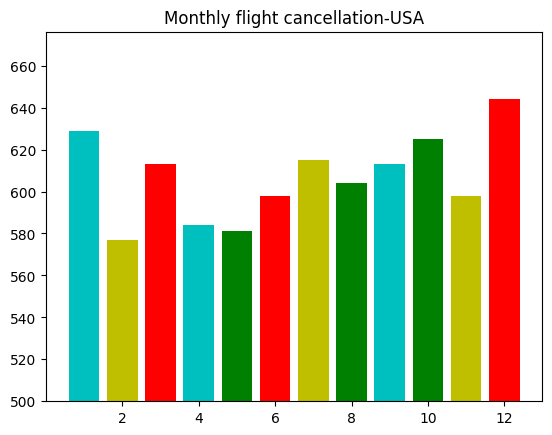

In [77]:
us_can = df['Month'].loc[(cond_4) & (df["Country Name"] == "United States") ].value_counts()
plt.bar(us_can.index,us_can.values,color = ["r", "c", "g", "y"] )
plt.title("Monthly flight cancellation-USA")
plt.ylim(500)

In [80]:
test_4 = 100*(us_can/total_count_us)
test_4

Month
1     32.540093
2     34.550898
3     31.630547
4     33.371429
5     31.136120
6     33.093525
7     32.215820
8     32.282202
9     34.036646
10    32.929399
11    32.167832
12    35.738069
Name: count, dtype: float64

(25.0, 40.0)

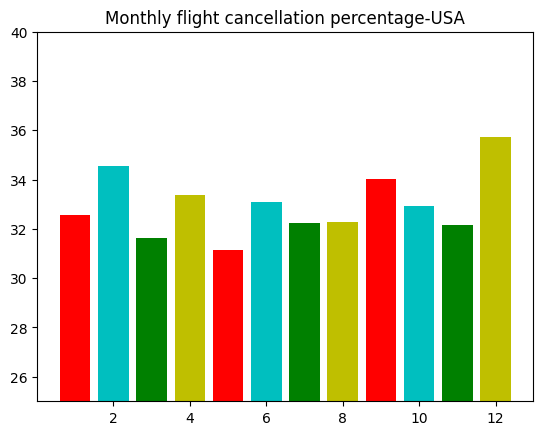

In [84]:
plt.bar(test_4.index, test_4.values, color = ["r", "c", "g", "y"] )
plt.title("Monthly flight cancellation percentage-USA")
plt.ylim(25,40)